I will try to perform some principle component analysis on the Fourier transforms of the EEG datasets. The goal of this will be to see if the Fourier transform maintains any information that can be used to seperate the "happy" and "sad" EEG recordings, defined by a positive and negative valence respectivly. 

In [1]:
import scipy.io
import numpy as np
import sklearn
from sklearn.decomposition import PCA
#note we need a specific version of mne for this to work, specify version ... when installing
import mne 
import matplotlib.pyplot as plt


mat = scipy.io.loadmat('All_PX_VY_EEG_Ratings.mat')
mat = mat["All_PX_VY_EEG_Ratings"]
print(mat[0,0])

[[336.  234.5 133.  ... 318.5 331.  331. ]
 [601.  597.5 594.  ... 400.  400.  400. ]
 [597.  597.  597.  ... 571.5 578.5 585.5]
 ...
 [  4.    0.    0.  ...   0.    0.    0. ]
 [  5.    0.    0.  ...   0.    0.    0. ]
 [  2.    0.    0.  ...   0.    0.    0. ]]


In [3]:
#first we will take the fourier transform of all the EEG signals, we will store the reported valence of the video as well

#creating info object for mne
info = mne.create_info(ch_names=['1','2','3','4','5','6','7','8'], sfreq = 32, ch_types="eeg")

f_store = np.zeros((58,36,8,129))
f_store_mean = np.zeros((58,36,129))
emotional_store = np.zeros((58,36,5))
for person in range(0,58):
    for video in range(0,36):
        eeg = mat[person,video][0:8]
        #move from numpy array to mne array
        raw_mne = mne.io.RawArray(eeg, info)
        #taking the fourier transform and then moving it back to a numpy array, just doing it in one line
        fourier_data = np.array(mne.time_frequency.psd_welch(raw_mne,fmin=0,fmax=16,picks=['1','2','3','4','5','6','7','8']))
        #storing the fourier transform in our matrix
        f_store[person,video,:] = fourier_data[0]
        #print(fourier_data)
        f_store_mean[person,video] = np.mean(fourier_data[0],axis=0)
        
        #also we can store the self reported emotional variables
        emotional_store[person,video]=mat[person,video][8:13,0]

       


Creating RawArray with float64 data, n_channels=8, n_times=3267
    Range : 0 ... 3266 =      0.000 ...   102.062 secs
Ready.
Effective window size : 8.000 (s)
Creating RawArray with float64 data, n_channels=8, n_times=2146
    Range : 0 ... 2145 =      0.000 ...    67.031 secs
Ready.
Effective window size : 8.000 (s)
Creating RawArray with float64 data, n_channels=8, n_times=1762
    Range : 0 ... 1761 =      0.000 ...    55.031 secs
Ready.
Effective window size : 8.000 (s)
Creating RawArray with float64 data, n_channels=8, n_times=2724
    Range : 0 ... 2723 =      0.000 ...    85.094 secs
Ready.
Effective window size : 8.000 (s)
Creating RawArray with float64 data, n_channels=8, n_times=3203
    Range : 0 ... 3202 =      0.000 ...   100.062 secs
Ready.
Effective window size : 8.000 (s)
Creating RawArray with float64 data, n_channels=8, n_times=1666
    Range : 0 ... 1665 =      0.000 ...    52.031 secs
Ready.
Effective window size : 8.000 (s)
Creating RawArray with float64 data, n_c

C:\Users\Jacob\AppData\Local\Temp\ipykernel_21792\3352859393.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fourier_data = np.array(mne.time_frequency.psd_welch(raw_mne,fmin=0,fmax=16,picks=['1','2','3','4','5','6','7','8']))


Effective window size : 8.000 (s)
Creating RawArray with float64 data, n_channels=8, n_times=1634
    Range : 0 ... 1633 =      0.000 ...    51.031 secs
Ready.
Effective window size : 8.000 (s)
Creating RawArray with float64 data, n_channels=8, n_times=1668
    Range : 0 ... 1667 =      0.000 ...    52.094 secs
Ready.
Effective window size : 8.000 (s)
Creating RawArray with float64 data, n_channels=8, n_times=1634
    Range : 0 ... 1633 =      0.000 ...    51.031 secs
Ready.
Effective window size : 8.000 (s)
Creating RawArray with float64 data, n_channels=8, n_times=1859
    Range : 0 ... 1858 =      0.000 ...    58.062 secs
Ready.
Effective window size : 8.000 (s)
Creating RawArray with float64 data, n_channels=8, n_times=2563
    Range : 0 ... 2562 =      0.000 ...    80.062 secs
Ready.
Effective window size : 8.000 (s)
Creating RawArray with float64 data, n_channels=8, n_times=2467
    Range : 0 ... 2466 =      0.000 ...    77.062 secs
Ready.
Effective window size : 8.000 (s)
Creati

We will perform PCA analysis, one frequency band at a time to look for seperation. First we can look at the delta frequency band, which is 0.5-4 Hz.

Text(0.5, 0.92, 'PCA analysis on delta band')

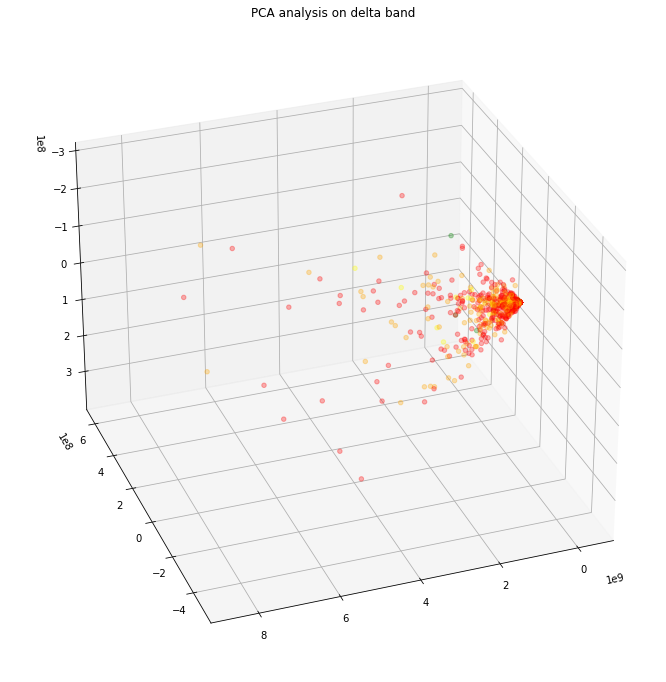

In [6]:
#the PCA analysis tool want the vectors to be fed in as a 2D array, so we have to rearrage our original one
#I think it's best to keep it around tho as it is a little more intuitive to work with
#entries [4:32]

#we are going to do our PCA analysis one frequency at a time, we can do delta first which is (0.5 Hz to 4 Hz)
delta = np.zeros((58,36,28))

for person in range(0,58):
    for video in range(0,36):
        delta[person,video] = f_store_mean[person,video,4:32] #we just want the fourier transform results that correspond to the delta frequency range

#shape is 2088 recordings x 28 frequencies of interest
delta = np.concatenate(delta,axis=0) #this was a way to get around some weird formatting problems I was having in numpy, essentially we just have all our delta frequency powers in a 2D array

# you have to print the entries in delta one by one or else VScode prevents you from viewing them
#for i in range(1000):
#    print(delta[i])

#get a vector of all the reported valences
valences = np.concatenate(emotional_store[:,:,2],axis=0)


#we are just addind the valences on to the end of all of the frequency data so when we delete any rows we are maintaining which valences are associated with which datasets
delta = np.c_[delta,valences]

#we want to delete all collumns containing data that seems to be corrupted in some way, ie. contains "nan" values 
#shoutout stackoverflow, this function works st. any collumns that contain a "nan" value are removed from the matrix
delta = delta[~np.isnan(delta).any(axis=1)]

#performing PCA 
X_reduced = PCA(n_components=3).fit_transform(delta)

#plotting
fig = plt.figure(1, figsize=(16, 12))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
#adding some colour specificity 
cdict = {-3:'blue',-2: 'blue',-1: 'green',0: 'green', 1: 'yellow', 2: 'yellow', 3: 'orange', 4:'orange',5:'red',6:'red'}

colors = np.vectorize(cdict.get)(delta[:,-1])

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c = colors,
    label = delta[:,-1],alpha=0.3
)
plt.title("PCA analysis on delta band")

We can repeat the above PCA analysis for the theta band specifically

Text(0.5, 0.92, 'PCA analysis on theta band')

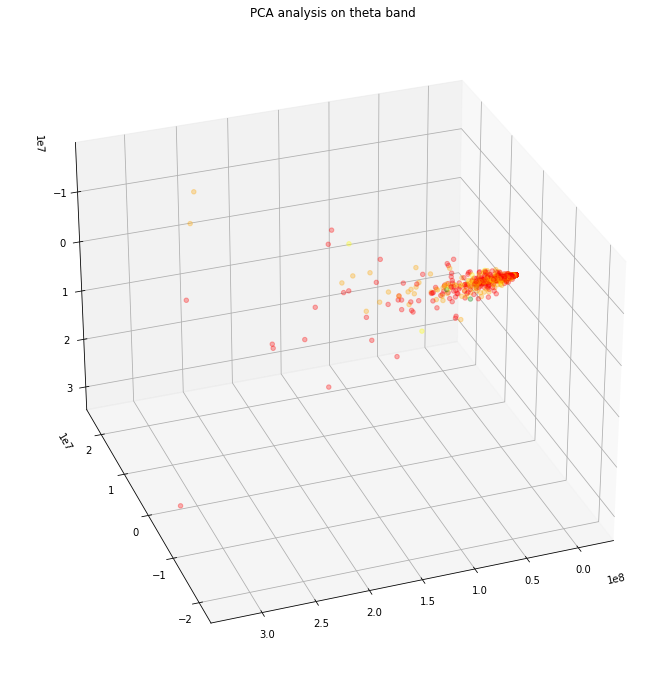

In [5]:
#the PCA analysis tool want the vectors to be fed in as a 2D array, so we have to rearrage our original one
#I think it's best to keep it around tho as it is a little more intuitive to work with
#entries [4:32]

#we are going to do our PCA analysis one frequency at a time, we can do delta first which is (0.5 Hz to 4 Hz)
delta = np.zeros((58,36,32))

for person in range(0,58):
    for video in range(0,36):
        delta[person,video] = f_store_mean[person,video,32:64] #we just want the fourier transform results that correspond to the delta frequency range

#shape is 2088 recordings x 28 frequencies of interest
delta = np.concatenate(delta,axis=0) #this was a way to get around some weird formatting problems I was having in numpy, essentially we just have all our delta frequency powers in a 2D array

# you have to print the entries in delta one by one or else VScode prevents you from viewing them
#for i in range(1000):
#    print(delta[i])

#get a vector of all the reported valences
valences = np.concatenate(emotional_store[:,:,2],axis=0)

#we are just adding the valences on to the end of all of the frequency data so when we delete any rows we are maintaining which valences are associated with which datasets
delta = np.c_[delta,valences]

#we want to delete all collumns containing data that seems to be corrupted in some way, ie. contains "nan" values 
#shoutout stackoverflow, this function works st. any collumns that contain a "nan" value are removed from the matrix
delta = delta[~np.isnan(delta).any(axis=1)]

#performing PCA 
 
X_reduced = PCA(n_components=3).fit_transform(delta)

#plotting
fig = plt.figure(1, figsize=(16, 12))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
#adding some colour specificity 
cdict = {-3:'blue',-2: 'blue',-1: 'green',0: 'green', 1: 'yellow', 2: 'yellow', 3: 'orange', 4:'orange',5:'red',6:'red'}

colors = np.vectorize(cdict.get)(delta[:,-1])

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c = colors,
    label = delta[:,-1],alpha=0.3
)
plt.title("PCA analysis on theta band")

In [5]:
#I think it's best to keep it around tho as it is a little more intuitive to work with
#entries [4:32]

#we are going to do our PCA analysis one frequency at a time, we can do delta first which is (0.5 Hz to 4 Hz)
delta = np.zeros((58,36,32))

for person in range(0,58):
    for video in range(0,36):
        delta[person,video] = f_store_mean[person,video,32:64] #we just want the fourier transform results that correspond to the delta frequency range

#shape is 2088 recordings x 28 frequencies of interest
delta = np.concatenate(delta,axis=0) #this was a way to get around some weird formatting problems I was having in numpy, essentially we just have all our delta frequency powers in a 2D array

# you have to print the entries in delta one by one or else VScode prevents you from viewing them
#for i in range(1000):
#    print(delta[i])

#get a vector of all the reported valences
valences = np.concatenate(emotional_store[:,:,2],axis=0)

#we are just adding the valences on to the end of all of the frequency data so when we delete any rows we are maintaining which valences are associated with which datasets
delta = np.c_[delta,valences]

#we want to delete all collumns containing data that seems to be corrupted in some way, ie. contains "nan" values 
#shoutout stackoverflow, this function works st. any collumns that contain a "nan" value are removed from the matrix
delta = delta[~np.isnan(delta).any(axis=1)]

print(delta)

[[7.93658362e+01 1.18709336e+02 9.22858191e+01 ... 7.41375806e+00
  1.06981251e+01 4.00000000e+00]
 [7.21209487e+01 9.68101612e+01 6.89016352e+01 ... 1.10390338e+01
  9.39857969e+00 5.00000000e+00]
 [5.56916218e+01 6.88970191e+01 4.13433599e+01 ... 7.96266940e+00
  3.84692224e+00 3.00000000e+00]
 ...
 [2.77244222e+07 2.74803195e+07 2.46215046e+07 ... 8.25194941e+06
  8.75920510e+06 4.00000000e+00]
 [8.06951243e+06 1.04695774e+07 1.13028537e+07 ... 3.92337114e+06
  3.27602539e+06 5.00000000e+00]
 [1.39110582e+07 1.35996799e+07 1.35678556e+07 ... 4.56629027e+06
  4.00649796e+06 5.00000000e+00]]
